In [21]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supporting Functions

In [22]:
def fixedPointIteration(f, x0, tol=1e-6, maxIter=100):
    """
    Fixed point iteration method for solving f(x) = x
    """
    
    for i in range(maxIter):
        x1 = f(x0)
        if abs(x1 - x0) < tol:
            return x1, i+1
        x0 = x1
        
    raise ValueError("Method failed after %d iterations." % maxIter)

def bisectionMethod(f, a, b, tol=1e-3, maxIter=100):
    """
    Bisection method for finding a root of a function f in the interval [a,b].
    """
    if f(a)*f(b) > 0:
        raise ValueError("f(a) and f(b) must have opposite signs.")
    for i in range(maxIter):
        c = (a + b)/2
        if f(c) == 0 or (b - a)/2 < tol:
            return c, i+1
        if f(a)*f(c) < 0:
            b = c
        else:
            a = c
    raise ValueError("Method failed after %d iterations." % maxIter)

def graph(fun, xlim, ylim, axv = None):
    fig = plt.figure()
    x = np.linspace(*xlim, 100)
    y = fun(x)
    ax = fig.add_subplot(1,1,1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    plt.plot(x, y)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    if axv != None:
        plt.axvline(x=axv, color='r')
    plt.grid()
    plt.show()
    return

## Section 2.1
### 1. Use the Bisection method to find solutions accurate to within $10^{-5}$ for the following problems.
###     $3x-e^{x}=0$ for $1 \le x \le 2$

#### The method convergest after 17 iterations to  1.51214

In [23]:
def f(x):
    return 3*x-np.e**x
axv = bisectionMethod(f,1,2,1e-5)
print(f'The method convergest after {axv[1]} iterations to {axv[0]: .5f}')

The method convergest after 17 iterations to  1.51214


### 2. 
### a) Sketch the graphs of $y = x$ and $y = tan x$

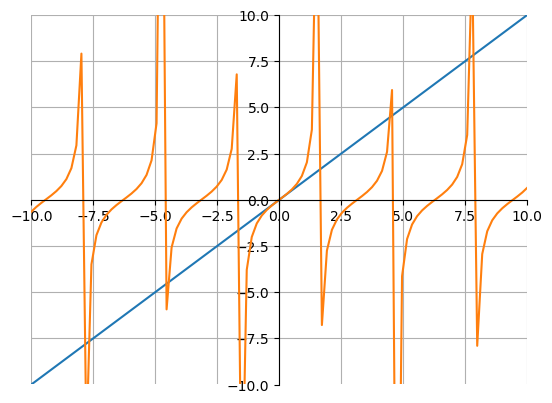

In [24]:
def f(x):
    return x
xlim = (-10,10)
ylim = (-10,10)
fig = plt.figure()
x = np.linspace(*xlim, 100)
y = f(x)
ax = fig.add_subplot(1,1,1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(x, y)

def f(x):
    return np.tan(x)
x = np.linspace(*xlim, 100)
y = f(x)

plt.plot(x, y)

plt.xlim(*xlim)
plt.ylim(*ylim)
plt.grid()
plt.show()

### b) Use the Bisection method to find an approximation to within $10^{-5}$ to the first positive value of $x$ with $x = tanx$

#### By this graph the interval for the bisection method is $[4 - 5]$. However the both 4 and 5 will be positive so the interval used will be $[4 - 4.7]$
#### The method converges after 17 iterations to  1.7320

In [25]:
def f(x):
    return x-np.tan(x)
axv = bisectionMethod(f,4,4.7,1e-5)
print(f'The method converges after {axv[1]} iterations to {axv[0]: .5f}')
axv = axv[0]

The method converges after 17 iterations to  4.49341


### 3. Find an approximation to $\sqrt{3}$ to within $10^{-4}$ using the Bisection method

#### The method converges after 17 iterations to  1.7320

In [26]:
def f(x):
    return -3+x**2
axv = bisectionMethod(f,1,2,1e-5)
print(f'The method converges after {axv[1]} iterations to {axv[0]: .4f}')

The method converges after 17 iterations to  1.7320


### 4. Use Theorem 2.1 to find a bound for the number of iterations needed to achieve an approximation with accuracy $10^{-3}$ to the solution of $x^{3} + x − 4 = 0$ lying in the interval $[1, 4]$.

#### The convergence of the Bisection method is 
#### <center>$|p_n - p| \le \frac{b-a}{2^n}$
#### So:
#### <center>$|p_n - p| \le \frac{b-a}{2^n} = 3*2^{-n} \le 10^{-3}$
#### Which implies that:
#### <center>$2^{-n} \le \frac{1}{3*10^{-3}}$
#### <center>= $-n \le -log_{2}(3000)$
#### <center>= $n \le 12$
#### thus, the number of iterations to converge will be less than or equal to $12$
#### After performing the method:
#### The method convergest after 12 iterations to  1.3787

In [27]:
def f(x):
    return x**3 + x -4
axv = bisectionMethod(f,1,4,1e-3)
print(f'The method convergest after {axv[1]} iterations to {axv[0]: .4f}')


The method convergest after 12 iterations to  1.3787


## Section 2.2

### 1) Use a fixed-point iteration method to determine a solution accurate to within $10^{−2}$ for 
### $x^{3} − x − 1 = 0$ on $[1, 2]$. 
### Use $p_{0} = 1$.

#### The function must be manipulated using the fixed point theorem
#### The interval does not contain zero so we can divide by $x$
#### <center>$-x^3 = -x-1$
#### <center>$\frac{x^3}{x} = \frac{x}{x} + \frac{1}{x}$
#### <center>$x = \sqrt{1 + \frac{1}{x}}$
#### to be valid $g' < 0$
#### <center>$\frac{d}{dx}(\sqrt{1+\frac{1}{x}})$ = $-\frac{1}{2x^{\frac{3}{2}}\sqrt{x+1}}$
#### on the interval $[1, 2]$, $g' < 0$ 

#### The method converges after 4 iterations to  1.32387

In [28]:
def f(x):
    return np.sqrt(1+x**-1)
axv = fixedPointIteration(f,1,1e-2)
print(f'The method converges after {axv[1]} iterations to {axv[0]: .5f}')


The method converges after 4 iterations to  1.32387


### 2) Use Theorem 2.3 to show that $g(x) = 2^{−x}$ has a unique fixed point on $[ \frac{1}{3} , 1]$. Use fixed-point iteration to find an approximation to the fixed point accurate to within $10^{−4}$. Use Corollary 2.5 to estimate the number of iterations required to achieve $10^{−4}$ accuracy, and compare this theoretical estimate to the number actually needed.

#### Because $2^{-x}$ is defined and differentiable, it is continuous on the interval $[\frac{1}{3}, {1}]$, and thus has a fixed point.

#### The number of iterations required is 
#### <center>$|p_n - p| \le k^n max(p_0 - a , b - p_0)$
#### <center>$k \ge |g'(\frac{1}{3})| = |-ln(2)*2^-(1/3)| = .551$
#### Thus, the number of iterations is
#### <center>$10^{-4} \le .551^n max(1-\frac{1}{3}, 1 - 1)$
#### <center>$10^{-4} \le .551^n*\frac{2}{3}$
#### <center>$n \le 15$
#### After running the method
#### The method converges after 12 iterations to  0.64121

In [29]:
def f(x):
    return 2**-x
axv = fixedPointIteration(f,1,1e-4)
print(f'The method converges after {axv[1]} iterations to {axv[0]: .5f}')

The method converges after 12 iterations to  0.64121


### 3) Use a fixed-point iteration method to determine a solution accurate to within $10^{−4}$ for $x = tanx$, for $x$ in $[4,5]$.

#### The series will not converge in the interval with out the fixed point theorem
#### to find the new $g$:
#### <center>$x=tan x$
#### <center>$arctan(x) = arctan(tan(x))$
#### <center>$x = arctanx$
#### To be in the interval [$4,6]$ it must be shifted by 1 period of tan, pi
#### <center>So, $x=arctan(x)+\pi$
#### The method convergest after 5 iterations to  4.4934

In [30]:
def f(x):
    return (np.arctan(x) + np.pi)
axv = fixedPointIteration(f,1,1e-4)
print(f'The method convergest after {axv[1]} iterations to {axv[0]: .4f}')

The method convergest after 5 iterations to  4.4934
